In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O ../data/sarcasm/sarcasm.json

In [18]:
import json
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling1D, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)

2.3.0


In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
with open("../data/sarcasm/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
training_sentences: [str] = sentences[0:training_size]
testing_sentences: [str] = sentences[training_size:]
training_labels: [int] = labels[0:training_size]
testing_labels: [int] = labels[training_size:]

In [5]:
tokenizer = Tokenizer(
    num_words=vocab_size, 
    oov_token=oov_tok
)
tokenizer.fit_on_texts(training_sentences)
word_index: dict = tokenizer.word_index

training_sequences: [[int]] = tokenizer.texts_to_sequences(training_sentences)
training_padded: np.ndarray = pad_sequences(
    training_sequences, 
    maxlen=max_length, 
    padding=padding_type, 
    truncating=trunc_type
)

testing_sequences: [[int]] = tokenizer.texts_to_sequences(testing_sentences)
testing_padded: np.ndarray = pad_sequences(
    testing_sequences, 
    maxlen=max_length, 
    padding=padding_type, 
    truncating=trunc_type
)

In [6]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [9]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, name="embedding_1", input_length=max_length),
    GlobalAveragePooling1D(name="embedding_2"),
    Dense(units=24, activation='relu', name="dense_2"),
    Dense(units=1, activation='sigmoid', name="dense_3")
], name="sarcasm_classifier")
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sarcasm_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
embedding_2 (GlobalAveragePo (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(
    x=training_padded, 
    y=training_labels, 
    validation_data=(testing_padded, testing_labels), 
    epochs=num_epochs,
    workers=-1,
    use_multiprocessing=True
)

Epoch 1/30
625/625 [==============================] - 2s 3ms/step - loss: 0.6658 - accuracy: 0.5854 - val_loss: 0.5830 - val_accuracy: 0.7482
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.4379 - accuracy: 0.8267 - val_loss: 0.3888 - val_accuracy: 0.8378
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3148 - accuracy: 0.8750 - val_loss: 0.3546 - val_accuracy: 0.8517
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2630 - accuracy: 0.8955 - val_loss: 0.3470 - val_accuracy: 0.8539
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2258 - accuracy: 0.9130 - val_loss: 0.3499 - val_accuracy: 0.8541
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.1985 - accuracy: 0.9233 - val_loss: 0.3576 - val_accuracy: 0.8502
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.1764 - accuracy: 0.9342 - val_loss: 0.3636 - val_accuracy: 0.8527
Epoch 

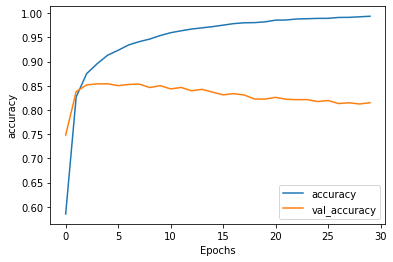

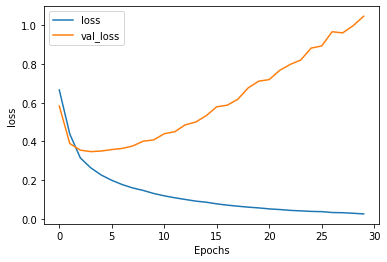

In [14]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [17]:
e: Embedding = model.layers[0]
weights: np.ndarray = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [19]:
out_v = io.open('../data/sarcasm/vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('../data/sarcasm/meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

<b>把"../data/sarcasm/vecs.tsv"文件和"../data/sarcasm/meta.tsv"文件放到<a href="https://projector.tensorflow.org/" target="_blank">这个网址</a>进行可视化展示</b>

In [20]:
try:
    from google.colab import files
except ImportError as e:
    print(e)
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

No module named 'termios'


In [21]:
sentence: [str] = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences: [[int]] = tokenizer.texts_to_sequences(sentence)
padded: np.ndarray = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.4589764e-01]
 [3.5659587e-06]]
